# Análise NDF - Dolar 

In [96]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [97]:
#importando excel
df = pd.read_excel('ndf_dolar.xlsx') #, index_col='inicio')

In [98]:
df

,inicio,vencimento,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct,compra_venda
0,2020-01-23,2021-01-23,366,1.096898e+09,211998515,5.675444e+09,5.174085,5.277566,compra
1,2020-06-24,2021-07-26,397,6.510641e+08,125805801,-3.369355e+09,5.175152,5.278655,venda
2,2020-04-23,2021-05-10,382,1.181750e+09,229563794,-6.083416e+09,5.147805,5.250761,venda
3,2020-03-11,2021-12-24,653,1.135962e+09,220725733,5.846213e+09,5.146486,5.249416,compra
4,2020-05-15,2021-06-07,388,9.444252e+08,184303773,4.839505e+09,5.124286,5.226771,compra
...,...,...,...,...,...,...,...,...,...
194,2020-01-31,2020-11-27,301,6.739565e+08,131164321,-3.462964e+09,5.138261,5.241026,venda
195,2020-03-10,2021-11-06,606,1.286195e+09,251291745,6.583174e+09,5.118333,5.220700,compra
196,2020-03-04,2020-08-31,180,1.022514e+09,198902953,5.256509e+09,5.140769,5.243585,compra
197,2020-01-15,2021-04-23,464,9.578870e+08,185209707,-4.954100e+09,5.171905,5.275343,venda


In [99]:
df.describe()

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct
count,199.000000,1.990000e+02,1.990000e+02,1.990000e+02,199.000000,199.000000
mean,393.412060,7.343856e+08,1.423182e+08,6.057125e+08,5.156040,5.259160
std,149.707159,4.299222e+08,8.317984e+07,4.364430e+09,0.138586,0.141357
min,48.000000,1.634023e+07,3.123474e+06,-7.924910e+09,4.160000,4.243200
25%,282.000000,3.849612e+08,7.447620e+07,-3.220076e+09,5.140000,5.242800
50%,396.000000,6.795174e+08,1.321091e+08,7.250218e+08,5.171364,5.274791
75%,517.000000,1.073426e+09,2.101367e+08,4.562105e+09,5.181055,5.284676
max,695.000000,1.551813e+09,2.997866e+08,8.089006e+09,5.660000,5.773200


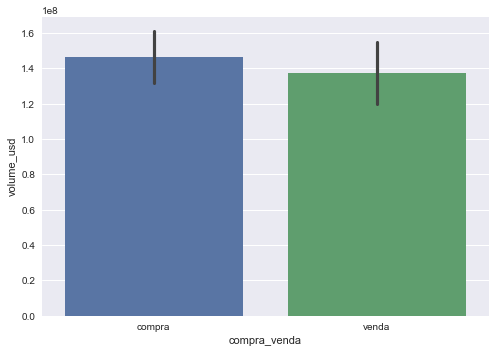

In [100]:
#volume de compra e venda
fig = sns.barplot(data=df, x='compra_venda', y='volume_usd')
plt.show(fig)

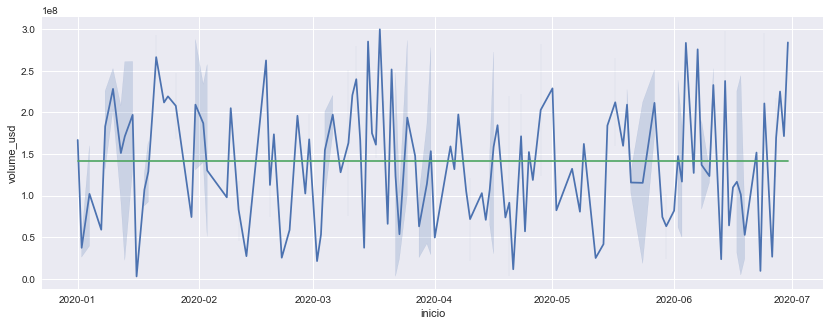

In [101]:
#comportamento do volume dos contratos ao longo do tempo e linha média 
plt.figure(figsize=(14,5))
fig1 = sns.lineplot(data=df, x='inicio', y= 'volume_usd')
fig2 = sns.lineplot(data=df, x='inicio', y= df['volume_usd'].mean())
plt.show()

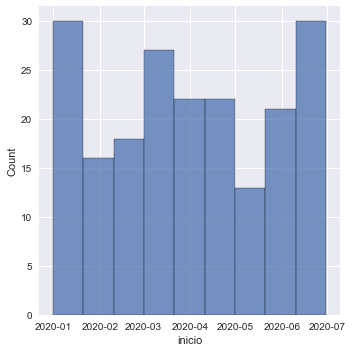

In [102]:
#histograma do inicio de contrato
fig = sns.displot(data = df, x='inicio')
plt.show(fig)

<Figure size 1008x360 with 0 Axes>

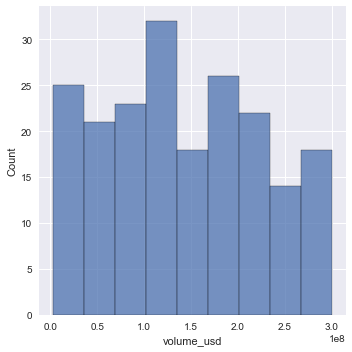

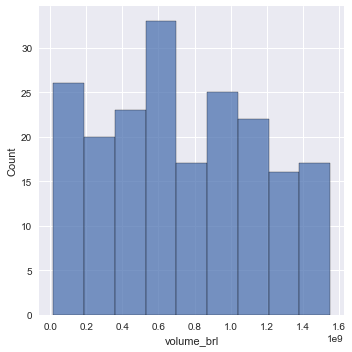

In [103]:
#histograma do vencimento de contrato
plt.figure(figsize=(14,5))
fig1 = sns.displot(data = df, x='volume_usd')
fig2 = sns.displot(data = df, x='volume_brl')
plt.show()

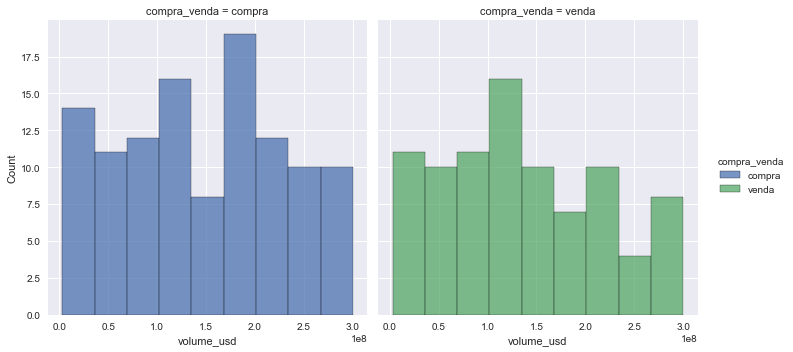

In [104]:
#histograma do volume de contrato
fig = sns.displot(data = df, x='volume_usd', hue='compra_venda', col ='compra_venda')
plt.show(fig)

<Figure size 1440x360 with 0 Axes>

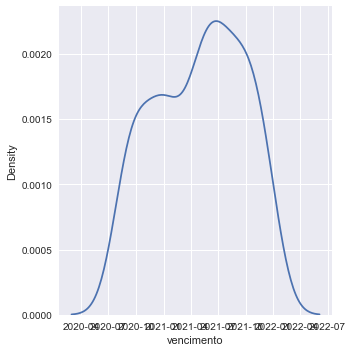

In [106]:
#densidade do vencimento de contrato
plt.figure(figsize=(20,5))
fig = sns.displot(data = df, x='vencimento', kind = 'kde')
plt.show()

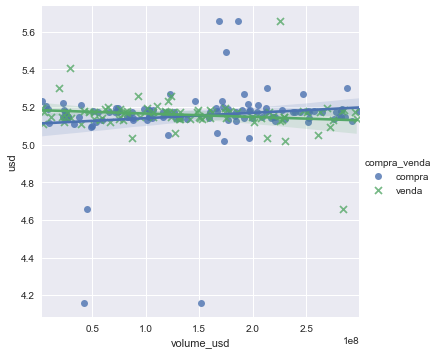

In [14]:
#regressão linear no tempo do inicio de contrato com o montante
fig = sns.lmplot(data = df, x='volume_usd', y='usd', hue='compra_venda', markers= ['o','x'])
plt.show(fig)

In [17]:
#tornando a coluna inicio como index
df.set_index('inicio', inplace=True)

In [19]:
#agrupando valores por média do mês
mes = df.resample('1M').mean()
mes.head(5)

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct
inicio,,,,,,
2020-01-31,420.081081,8.349781e+08,1.611200e+08,1.662630e+09,5.183554,5.287225
2020-02-29,439.740741,6.844608e+08,1.328253e+08,3.789474e+08,5.141348,5.244175
2020-03-31,407.761905,7.725731e+08,1.489919e+08,1.639651e+09,5.182707,5.286361
2020-04-30,362.172414,6.423452e+08,1.247801e+08,-3.722615e+08,5.149062,5.252043
2020-05-31,384.681818,7.099835e+08,1.376770e+08,-2.856174e+08,5.128970,5.231549


In [22]:
compra = df[(df['compra_venda']=='compra')]
compra

,vencimento,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct,compra_venda
inicio,,,,,,,,
2020-01-23,2021-01-23,366,1.096898e+09,211998515,5.675444e+09,5.174085,5.277566,compra
2020-03-11,2021-12-24,653,1.135962e+09,220725733,5.846213e+09,5.146486,5.249416,compra
2020-05-15,2021-06-07,388,9.444252e+08,184303773,4.839505e+09,5.124286,5.226771,compra
2020-06-02,2021-10-09,494,1.239531e+08,23918909,6.423525e+08,5.182222,5.285867,compra
2020-01-31,2021-06-22,508,1.525405e+09,287657238,8.089006e+09,5.302857,5.408914,compra
...,...,...,...,...,...,...,...,...
2020-06-07,2020-09-17,102,1.415989e+09,275752465,7.271103e+09,5.135000,5.237700,compra
2020-01-20,2021-06-10,507,1.021151e+09,195666862,5.329206e+09,5.218824,5.323200,compra
2020-06-03,2021-02-03,245,2.600047e+08,50197767,1.346723e+09,5.179608,5.283200,compra


In [86]:
venda = df[(df['compra_venda']=='venda')]
venda

,vencimento,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct,compra_venda
inicio,,,,,,,,
2020-06-24,2021-07-26,397,6.510641e+08,125805801,-3.369355e+09,5.175152,5.278655,venda
2020-04-23,2021-05-10,382,1.181750e+09,229563794,-6.083416e+09,5.147805,5.250761,venda
2020-01-15,2020-11-28,318,1.399776e+09,269341244,-7.274690e+09,5.197037,5.300978,venda
2020-01-13,2020-12-02,324,1.317363e+09,260921296,-6.651218e+09,5.048889,5.149867,venda
2020-02-19,2021-10-05,594,7.764614e+08,151051012,-3.991316e+09,5.140392,5.243200,venda
...,...,...,...,...,...,...,...,...
2020-04-23,2021-01-19,271,6.312171e+08,120658650,-3.302167e+09,5.231429,5.336057,venda
2020-02-11,2021-08-15,551,6.125057e+08,118225326,-3.173290e+09,5.180833,5.284450,venda
2020-01-31,2020-11-27,301,6.739565e+08,131164321,-3.462964e+09,5.138261,5.241026,venda


In [26]:
compra_mes = compra.resample('1M').mean()
compra_mes.head(5)

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct
inicio,,,,,,
2020-01-31,456.538462,8.188363e+08,1.573556e+08,4.263455e+09,5.198484,5.302454
2020-02-29,435.428571,7.321249e+08,1.423246e+08,3.767159e+09,5.119750,5.222145
2020-03-31,409.230769,8.778791e+08,1.690417e+08,4.561048e+09,5.185088,5.288790
2020-04-30,285.461538,6.365106e+08,1.237885e+08,3.273288e+09,5.145992,5.248911
2020-05-31,403.636364,6.543478e+08,1.269155e+08,3.377781e+09,5.087024,5.188764


In [27]:
venda_mes = venda.resample('1M').mean()
venda_mes.head(5)

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,usd_ct
inicio,,,,,,
2020-01-31,333.909091,8.731314e+08,1.700176e+08,-4.484774e+09,5.148264,5.251230
2020-02-29,444.384615,6.331302e+08,1.225952e+08,-3.269896e+09,5.164607,5.267899
2020-03-31,405.375000,6.014508e+08,1.164109e+08,-3.107618e+09,5.178838,5.282415
2020-04-30,424.500000,6.470859e+08,1.255858e+08,-3.334270e+09,5.151556,5.254587
2020-05-31,365.727273,7.656192e+08,1.484386e+08,-3.949015e+09,5.170916,5.274334


In [34]:
net = venda_mes.volume_usd - compra_mes.volume_usd
net

inicio
2020-01-31    1.266202e+07
2020-02-29   -1.972945e+07
2020-03-31   -5.263078e+07
2020-04-30    1.797330e+06
2020-05-31    2.152308e+07
2020-06-30    1.767012e+07
Freq: M, Name: volume_usd, dtype: float64

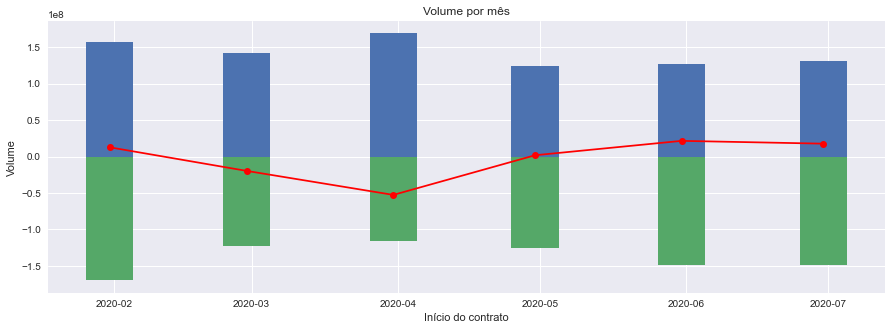

In [79]:
# gráfico de barras
plt.figure(figsize=(15,5))
fig1 = plt.bar(compra_mes.index, compra_mes.volume_usd, width=10) # ou df.inicio.dt.month
fig2 = plt.bar(venda_mes.index, -venda_mes.volume_usd, width=10)
fig3 = plt.plot(compra_mes.index, net, color='red', marker='o')
#fig4 = plt.plot(mes.index, mes.volume_usd.mean())
plt.xlabel('Início do contrato')
plt.ylabel('Volume')
plt.title('Volume por mês') 
plt.show()

In [65]:
#configurando variável para o gráfico
x = np.arange(len(compra_mes.index))
largura = 0.35

<ipython-input-81-ce6397b4e410>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(compra_mes.index)


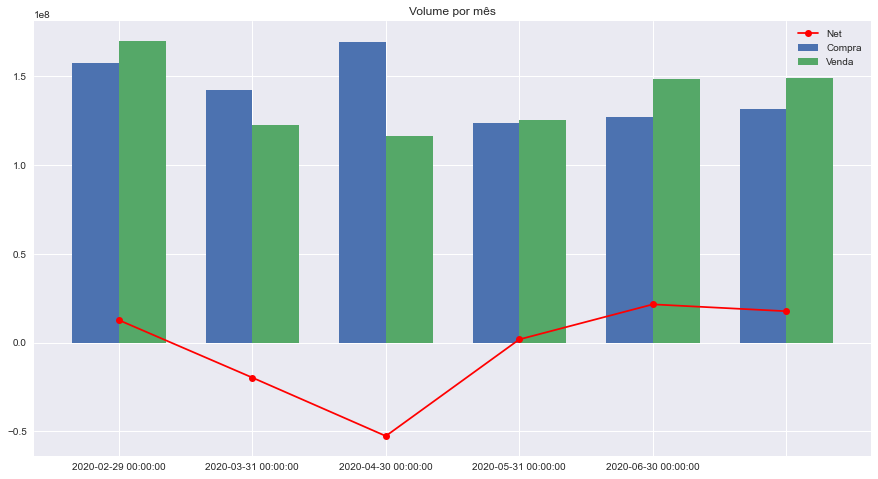

In [81]:
plt.rc('figure', figsize = (15, 8))
fig,ax = plt.subplots()
g1 = ax.bar(x - largura/2, compra_mes.volume_usd, largura, label='Compra')
g2 = ax.bar(x + largura/2, venda_mes.volume_usd, largura, label='Venda')
g3 = ax.plot(x, net, color='red', label='Net' , marker='o')
#g3 = plt.plot(compra_mes.index, net, color='red')
ax.set_xticklabels(compra_mes.index) 
ax.legend()
ax.set_title('Volume por mês') 
plt.show()

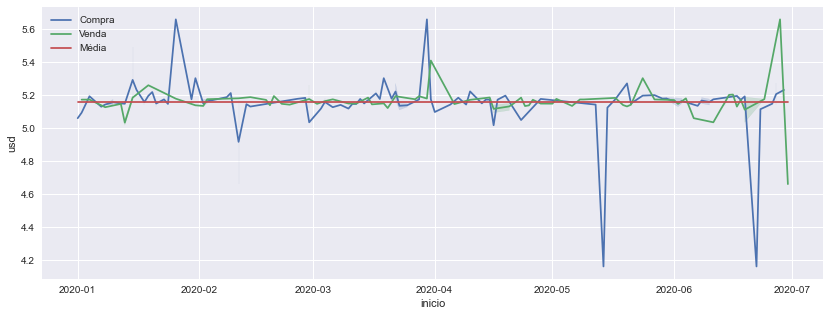

In [95]:
#valor dolar de compra e venda 
plt.figure(figsize=(14,5))
fig1 = sns.lineplot(data=compra, x=compra.index, y= 'usd', label='Compra')
fig2 = sns.lineplot(data=venda, x=venda.index, y= 'usd', label='Venda')
fig3 = sns.lineplot(data=df, x=df.index, y= df['usd'].mean(), label='Média')
plt.show()